# Notebook 41: Uncertainty in shortening estimates

[Judge and Allmendinger (2011)](https://www.sciencedirect.com/science/article/abs/pii/S0191814111000083) describe the use of area balance to assess the uncertainty in shortening estimates from cross sections.

Since area balance provides an analytical solution, it is possible to propagate errors from the vertices of the polygon defining the orogen, and the undeformed stratigraphy, to determine the errors in shortening estimates (Eqs. 1 to 9 in [Judge and Allmendinger, 2011](https://www.sciencedirect.com/science/article/abs/pii/S0191814111000083)).

With the help of the [uncertainties](https://pythonhosted.org/uncertainties/) package, it is surprisingly easy to do this calculation. This package propagates errors using a Gaussian error formula (see [Notebook 14](nb14_uncertainties.ipynb)).

Let's look at a cross section from the southern Subandean fold and thrust belt in Northern Argentina ([Echavarría et al., 2003](https://pubs.geoscienceworld.org/aapg/aapgbull/article-abstract/87/6/965/40087/Subandean-thrust-and-fold-belt-of-northwestern?redirectedFrom=fulltext)). This is also Exercise 3 of chapter 12 in [Allmendinger et al. (2012)](https://www.cambridge.org/core/books/structural-geology-algorithms/C5AB97C135925A5D49726B741738DCA9).

## Installing the uncertainties package

If you haven't done so, install the [uncertainties](https://pythonhosted.org/uncertainties/) package by running the cell below.

In [ ]:
# run this cell if uncertainties is not installed
import sys
!{sys.executable} -m pip install --upgrade uncertainties

Next we import the required libraries. The uncertainties package outputs some warnings that aren't very relevant, therefore we ignore them.

In [1]:
# import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy
# suppress warnings from uncertainties package
import warnings
warnings.filterwarnings("ignore")

Now we import the [cross section data](../data/subandean.txt), which is included in Exercise 3 of chapter 12 in [Allmendinger et al. (2012)](https://www.cambridge.org/core/books/structural-geology-algorithms/C5AB97C135925A5D49726B741738DCA9). These are the vertices (and their uncertainties) of the polygon defining the Subandean fold and thrust belt.

We also plot the data and error bars.

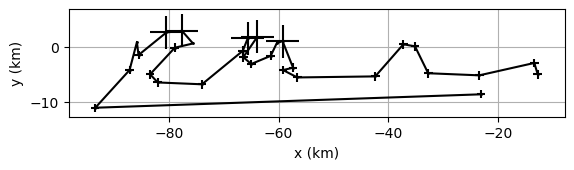

In [2]:
# import data (chapter 12, Exercise 3, Allmendinger et al. 2012)
path = os.path.join("..", "data", "subandean.txt")
data = np.loadtxt(path)
x = data[:, 0]  # x-coordinates in km
y = data[:, 1]  # y-coordinates in km
x_err = data[:, 2]  # x-errors in km
y_err = data[:, 3]  # y-errors in km
tag = data[:, 4]  # tag for each point

# plot data
fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o-', markersize=1, color="black")
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
ax.set_aspect("equal")
ax.grid()
plt.show()

Creating the vertices with uncertainties is very easy. We just need to use the `unumpy.uarray()` method:

In [3]:
# x and y arrays with uncertainties
x = unumpy.uarray(x, x_err)
y = unumpy.uarray(y, y_err)

Now, we need a function that computes the area of the polygon. The function below will do the job. Notice that the vertices defining the polygon must be in sequential order.

In [4]:
def polyg_area(x, y):
    """
    Calculate the area of a polygon using the shoelace formula.
    
    Parameters:
    x (numpy array): x-coordinates of the polygon vertices.
    y (numpy array): y-coordinates of the polygon vertices.
    
    Returns:
    float: Area of the polygon.
    """ 
    area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
    
    return area

uarrays work in a similar way than Numpy arrays. Therefore we can pass the vertices to our function to calculate the area of the fold and thrust belt. The estimated area has an uncertainty.

In [5]:
# calculate and print area
area = polyg_area(x, y) # km^2
print(f"Area of polygon: {area:.2f} km^2")

Area of polygon: 447.80+/-47.81 km^2


From the area and the undeformed thickness on the eastern (`t_1`) and western (`t_2`) sides of the orogen ([Allmendinger et al., 2012](https://www.cambridge.org/core/books/structural-geology-algorithms/C5AB97C135925A5D49726B741738DCA9)), we can calculate the shortening of the section:

In [ ]:
# Stratigraphic thickness from Allmendinger et al. (2012)
# eastern side
t_1 = ufloat(2.9, 0.29)  # value and error in km
# western side
t_2 = ufloat(4.6, 0.46)  # value and error in km

# current width at about 5 km depth
w_f = x[-1] - x[2] # km

# initial width: Eq. 12.13 of Allmendinger et al. (2012) 
w_i = (2*area) / (t_1 + t_2) # km

# shortening
shortening = w_i - w_f # km
# shortening in percent
shortening_perc = (shortening / w_i) * 100 # %

print(f"Current width: {w_f:.2f} km")
print(f"Initial width: {w_i:.2f} km")
print(f"Shortening: {shortening:.2f} km")
print(f"Shortening: {shortening_perc:.2f} %")

Current width: 74.36+/-1.13 km
Initial width: 119.41+/-15.41 km
Shortening: 45.06+/-15.35 km
Shortening: 37.73+/-8.01 %


The estimated shortening is close to that calculated by [Judge and Allmendinger (2011)](https://www.sciencedirect.com/science/article/abs/pii/S0191814111000083) using a Gaussian error (see their Table 2).